# Problem Statement 

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.
Also, certain attributes of each product and store have been defined. The aim of this data science project is to build
a predictive model and find out the sales of each product at a particular store.

# Hypothesis Generation Based On Various Factors

1) Visibility Feature:- More the visibilty of a product more will be the sale.
    
2) Price Feature:- High price product sale will be less if store is in tier 3 or tier 2 city and vice versa.
    
3) Discount:- Product having discount will be sold more.
 
4) Order Size depend upon supermarket type.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import warnings

## Data collection and Analysis

In [2]:
 big_mart_data_train = pd.read_csv('train.csv')
big_mart_data_test = pd.read_csv('test.csv')

In [3]:
big_mart_data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
big_mart_data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# number of data points and numbers of features
big_mart_data_train.shape

(8523, 12)

In [6]:
# getting some information about the dataset\
big_mart_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Feature :

-  Item_Identifier            
-  Item_Fat_Content           
-  Item_Type                  
-  Outlet_Identifier          
-  Outlet_Size                
-  Outlet_Location_Type       
-  Outlet_Type                


# Exploratory Data Analysis

**Univariate Analysis**

Numerical Feature

In [7]:
sns.set()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11860\872624327.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data_train['Item_Weight'])


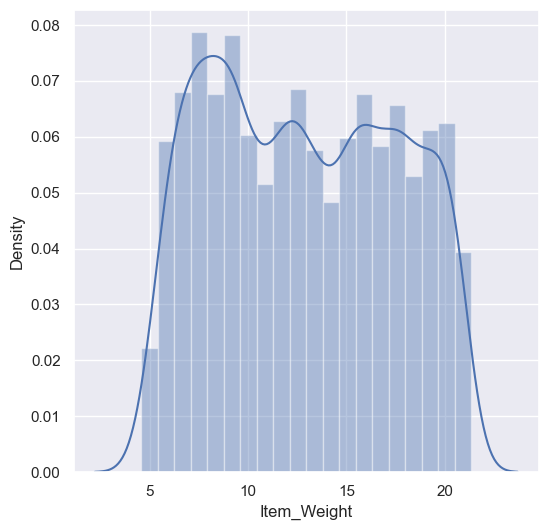

In [8]:
# Item_weight distribution
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data_train['Item_Weight'])
plt.show()
warnings.filterwarnings("ignore")

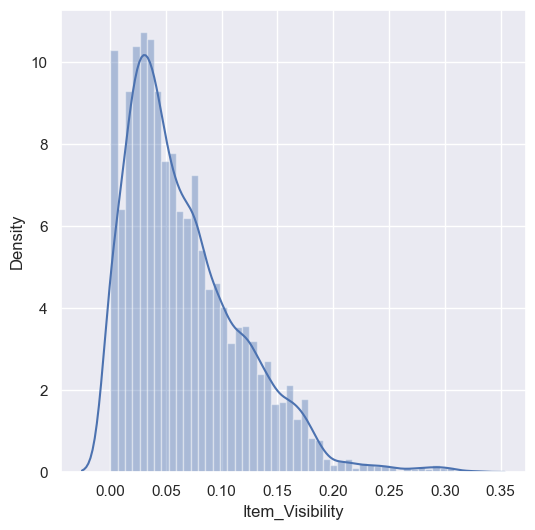

In [9]:
#  Item Visibility
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data_train['Item_Visibility'])
plt.show()

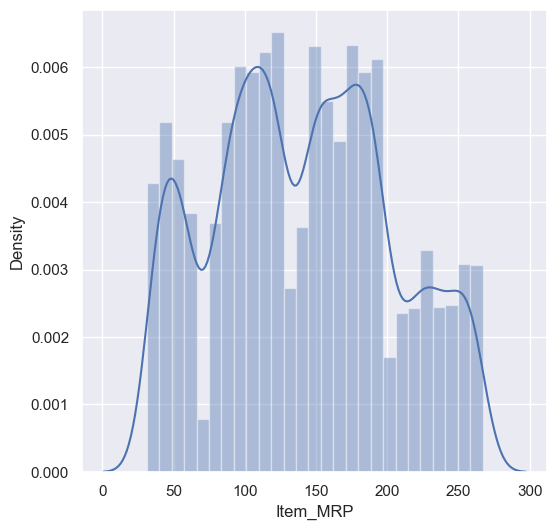

In [10]:
# Item_MRP distribution
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data_train['Item_MRP'])
plt.show()

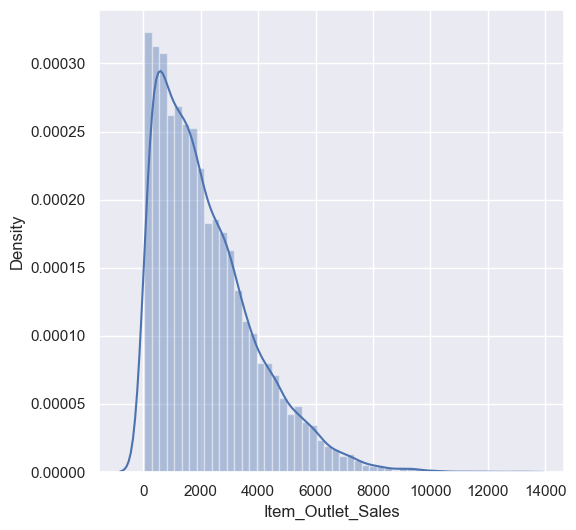

In [11]:
# Item_Outlet_Sales distribution
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data_train['Item_Outlet_Sales'])
plt.show()

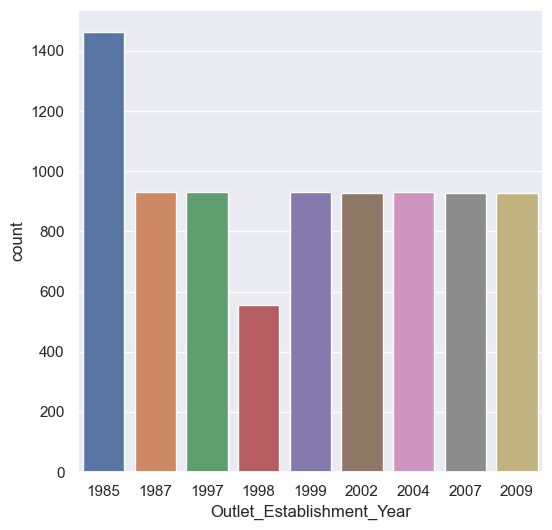

In [12]:
# Outlet_Establishment_Year column

plt.figure(figsize = (6,6))
sns.countplot(x = "Outlet_Establishment_Year", data = big_mart_data_train)
plt.show()

**Categorical Features**

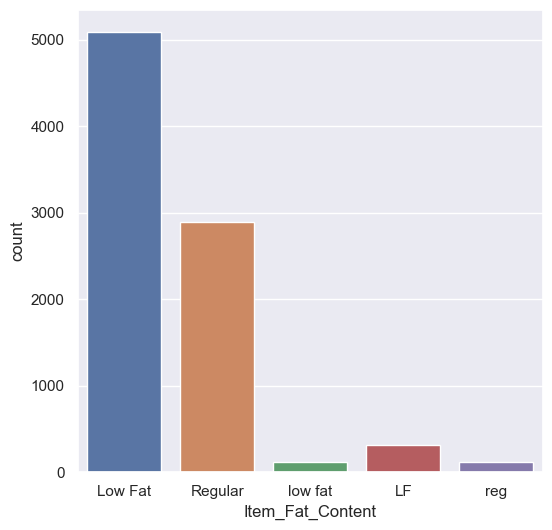

In [13]:
# Item_Fat_Content column
plt.figure(figsize = (6,6))
sns.countplot(x = "Item_Fat_Content", data = big_mart_data_train)
plt.show()

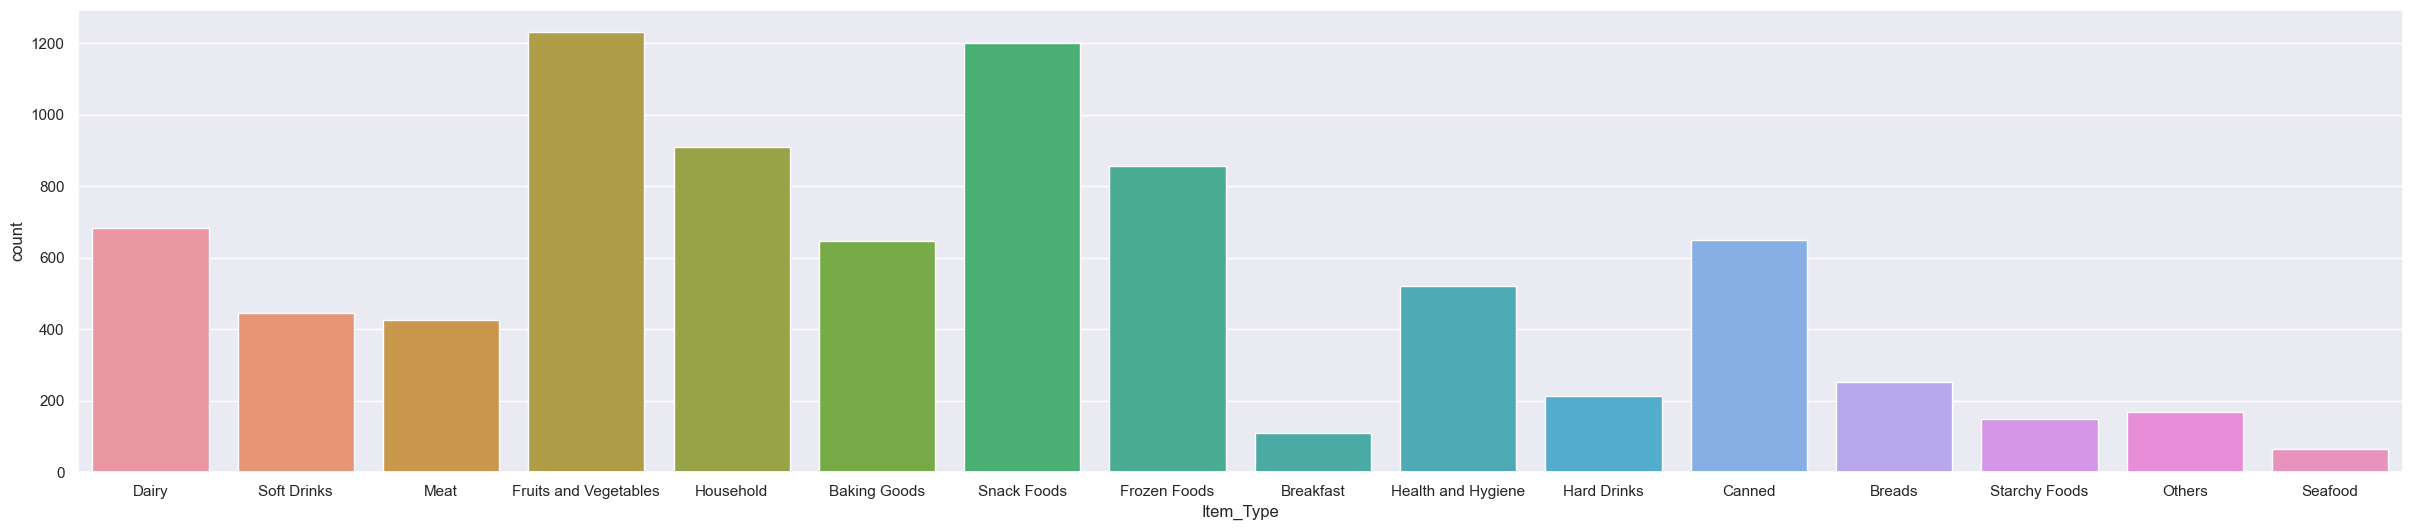

In [14]:
# Item_Type column
plt.figure(figsize = (30,6))
sns.countplot(x = "Item_Type", data = big_mart_data_train)
plt.show()

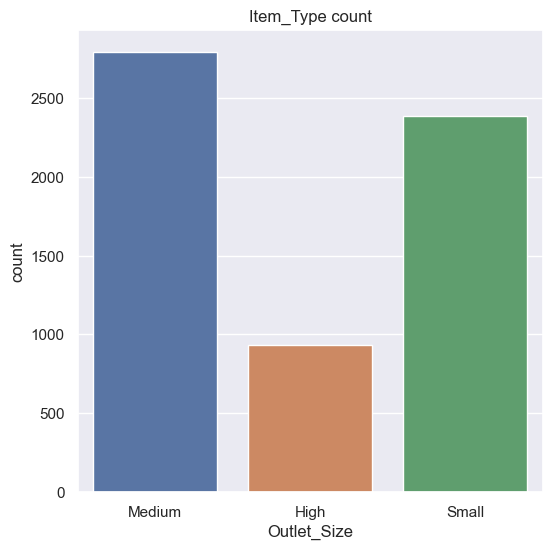

In [15]:
# Outlet_Size column
plt.figure(figsize = (6,6))
sns.countplot(x = "Outlet_Size", data = big_mart_data_train)
plt.title('Item_Type count')
plt.show()

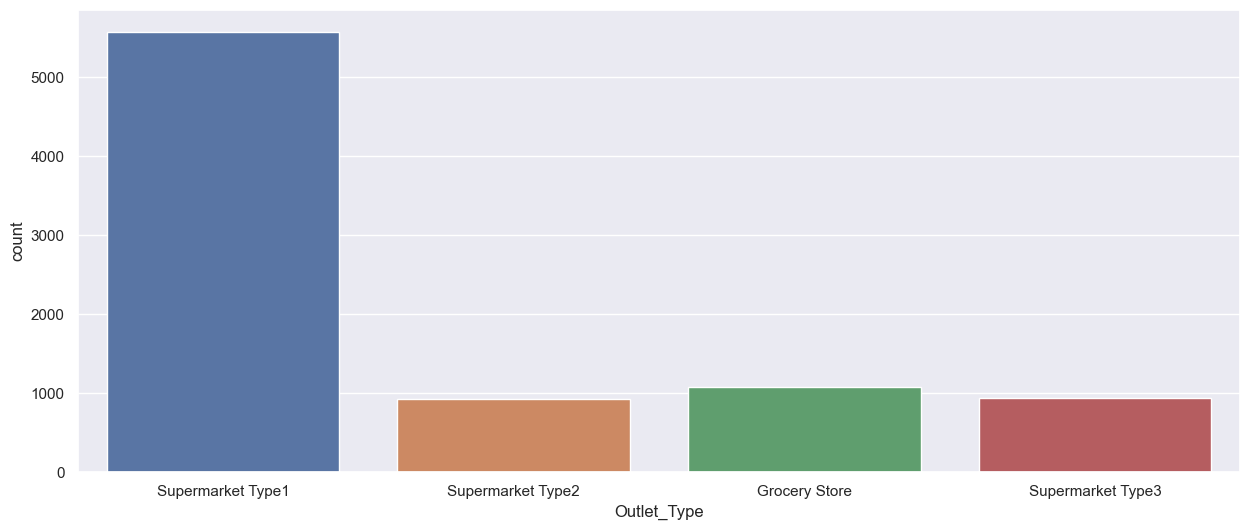

In [16]:
# Outlet_Type column
plt.figure(figsize = (15,6))
sns.countplot(x = "Outlet_Type", data = big_mart_data_train)
plt.show()

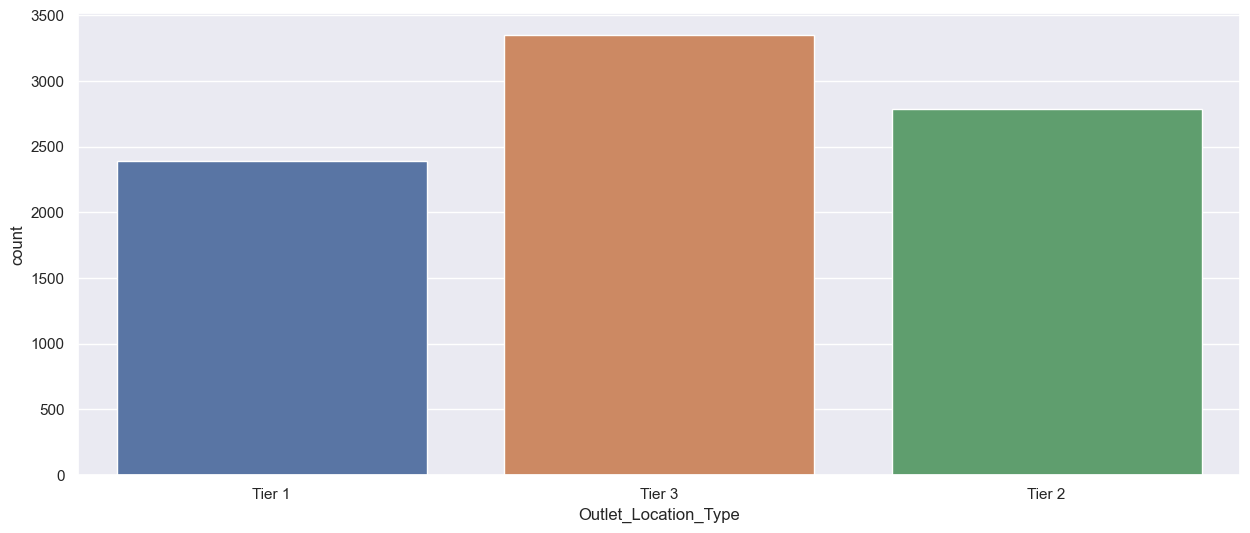

In [17]:
# Outlet_Location_Type column
plt.figure(figsize = (15,6))
sns.countplot(x = "Outlet_Location_Type", data = big_mart_data_train)
plt.show()

<Axes: >

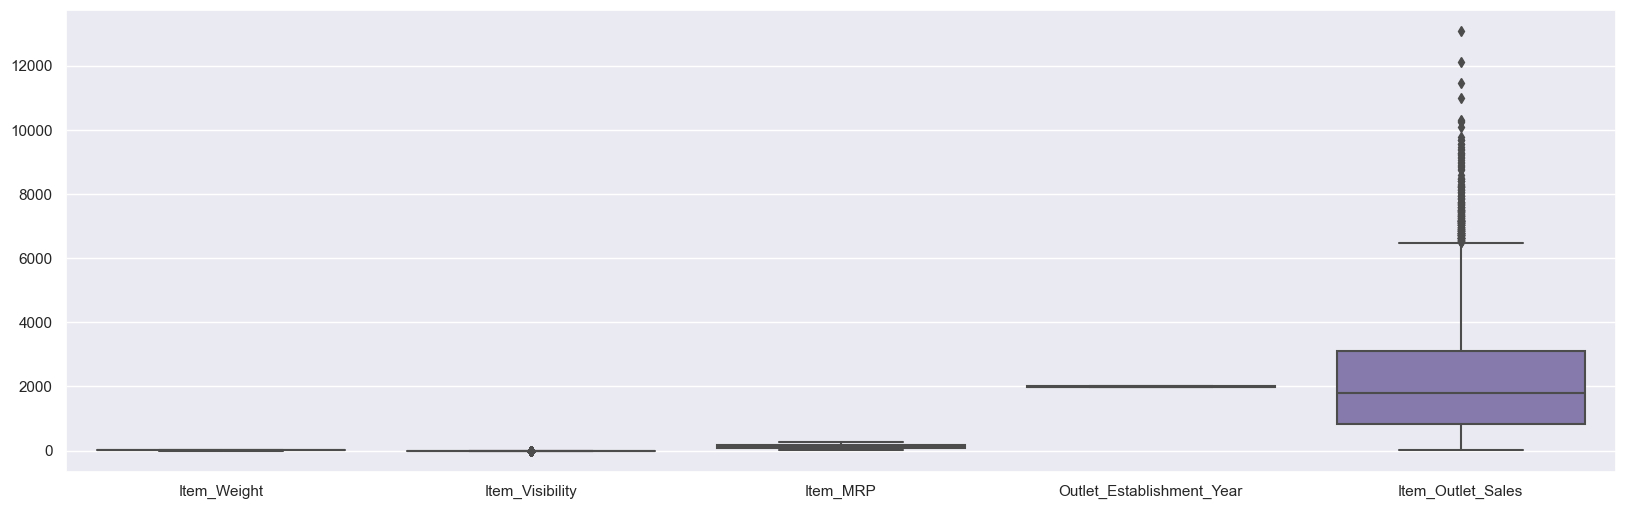

In [18]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=big_mart_data_train, ax = ax)

Bivariate Analysis

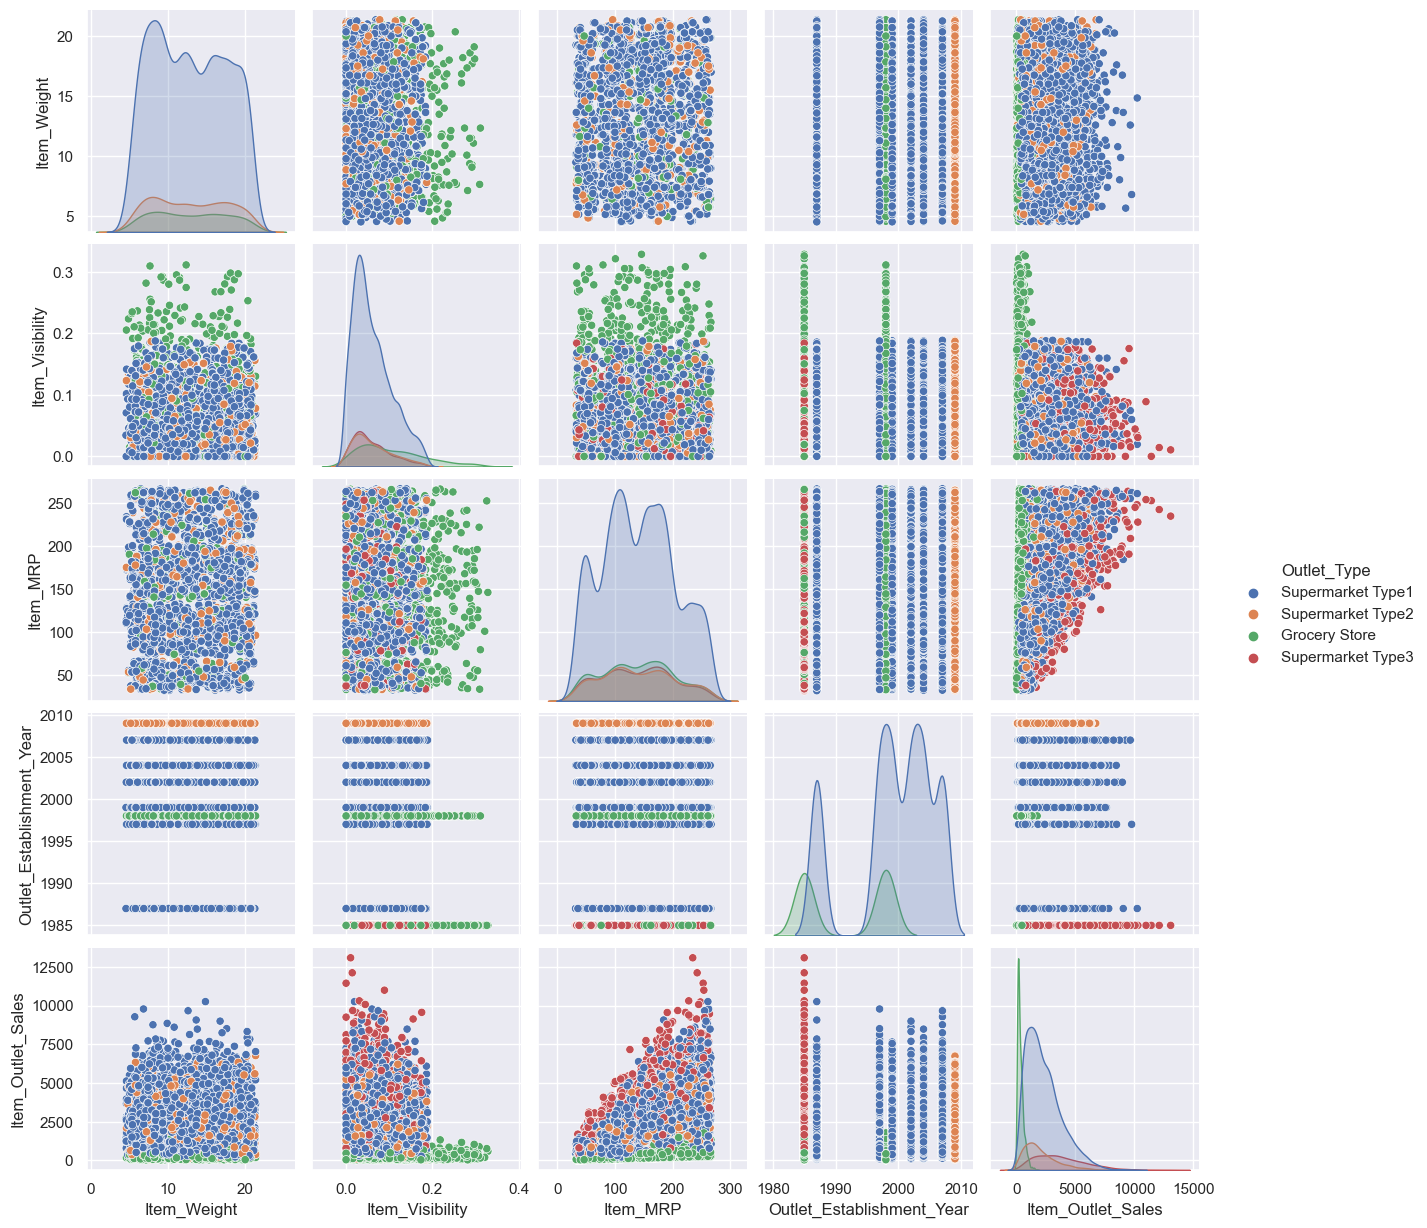

In [19]:
sns.pairplot(big_mart_data_train, hue = 'Outlet_Type')

<Axes: xlabel='Outlet_Type', ylabel='Outlet_Size'>

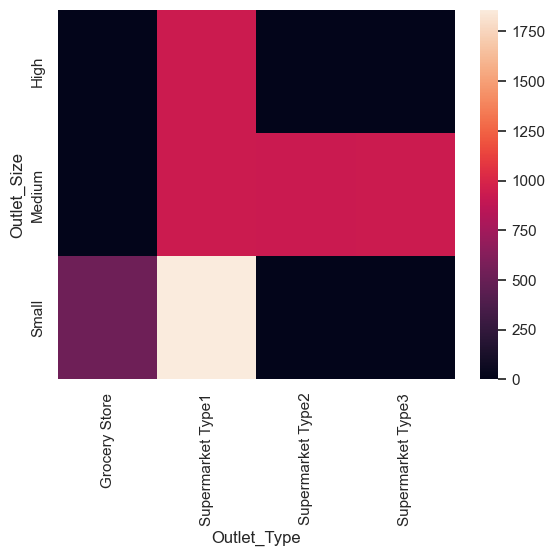

In [20]:
sns.heatmap(pd.crosstab(big_mart_data_train['Outlet_Size'],big_mart_data_train['Outlet_Type']))

**Missing Value Treatment**

In [21]:
# checking for missing value for training dataset

big_mart_data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
# checking for missing value for testing dataset
big_mart_data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**Handling Missing Values**

Mean --> average value   (Numerical feature)

Mode --> Most repeated value   (Categorical Feature)

In [23]:
# mean value of 'Item_Weight' column

print(big_mart_data_train['Item_Weight'].mean())
print(big_mart_data_test['Item_Weight'].mean())

12.857645184135976
12.695633368756642


In [24]:
#  filling the missing value in the 'Item_Weight' column with "Mean value"

big_mart_data_train['Item_Weight'].fillna(big_mart_data_train['Item_Weight'].mean(), inplace = True)
big_mart_data_test['Item_Weight'].fillna(big_mart_data_test['Item_Weight'].mean(), inplace = True)

In [25]:
# mode of "Outlet_Size" column
print(big_mart_data_train['Outlet_Size'].mode())
print(big_mart_data_test['Outlet_Size'].mode())

0    Medium
Name: Outlet_Size, dtype: object
0    Medium
Name: Outlet_Size, dtype: object


Replacing the missing values in "Outlet_Size" with Mode

In [26]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size_train = big_mart_data_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_Outlet_size_test = big_mart_data_test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [27]:
print(mode_of_Outlet_size_train)
print(mode_of_Outlet_size_test)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [28]:
miss_values_train = big_mart_data_train['Outlet_Size'].isnull()
miss_values_test = big_mart_data_test['Outlet_Size'].isnull()

In [29]:
big_mart_data_train.loc[miss_values_train, 'Outlet_Size'] = big_mart_data_train.loc[miss_values_train,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size_train[x])
big_mart_data_test.loc[miss_values_test, 'Outlet_Size'] = big_mart_data_test.loc[miss_values_test,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size_test[x])

In [30]:
# checking the missing value

big_mart_data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [31]:
big_mart_data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [32]:
#  Statistical measures about the train data

big_mart_data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [33]:
#  Statistical measures about the test data

big_mart_data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Data Pre-Processing

In [34]:
big_mart_data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
big_mart_data_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [36]:
big_mart_data_test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [37]:
big_mart_data_train.replace({'Item_Fat_Content': {'LF': 'Low Fat', 'reg' : 'Regular', 'low fat' : 'Low Fat'}}, inplace = True)
big_mart_data_test.replace({'Item_Fat_Content': {'LF': 'Low Fat', 'reg' : 'Regular', 'low fat' : 'Low Fat'}}, inplace = True)


In [38]:
big_mart_data_train['Item_Fat_Content'].value_counts()
big_mart_data_test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

**Label Encoding**

In [39]:
encoder = LabelEncoder()

In [40]:
# For Train

big_mart_data_train['Item_Identifier'] = encoder.fit_transform(big_mart_data_train['Item_Identifier'])

big_mart_data_train['Item_Fat_Content'] = encoder.fit_transform(big_mart_data_train['Item_Fat_Content'])

big_mart_data_train['Item_Type'] = encoder.fit_transform(big_mart_data_train['Item_Type'])

big_mart_data_train['Outlet_Identifier'] = encoder.fit_transform(big_mart_data_train['Outlet_Identifier'])

big_mart_data_train['Outlet_Size'] = encoder.fit_transform(big_mart_data_train['Outlet_Size'])

big_mart_data_train['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data_train['Outlet_Location_Type'])

big_mart_data_train['Outlet_Type'] = encoder.fit_transform(big_mart_data_train['Outlet_Type'])

In [41]:
# For Test

big_mart_data_test['Item_Identifier'] = encoder.fit_transform(big_mart_data_test['Item_Identifier'])

big_mart_data_test['Item_Fat_Content'] = encoder.fit_transform(big_mart_data_test['Item_Fat_Content'])

big_mart_data_test['Item_Type'] = encoder.fit_transform(big_mart_data_test['Item_Type'])

big_mart_data_test['Outlet_Identifier'] = encoder.fit_transform(big_mart_data_test['Outlet_Identifier'])

big_mart_data_test['Outlet_Size'] = encoder.fit_transform(big_mart_data_test['Outlet_Size'])

big_mart_data_test['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data_test['Outlet_Location_Type'])

big_mart_data_test['Outlet_Type'] = encoder.fit_transform(big_mart_data_test['Outlet_Type'])

In [42]:
big_mart_data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [43]:
# Removing Outlier from Dataset

threshold = 1.5
q1 = big_mart_data_train['Item_Outlet_Sales'].quantile(0.25)
q3 = big_mart_data_train['Item_Outlet_Sales'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - threshold * iqr
upper_bound = q3 + threshold * iqr

# Filter the data to exclude outliers
filtered_big_mart_data_train = big_mart_data_train[(big_mart_data_train['Item_Outlet_Sales'] >= lower_bound) & (big_mart_data_train['Item_Outlet_Sales'] <= upper_bound)]

<Axes: >

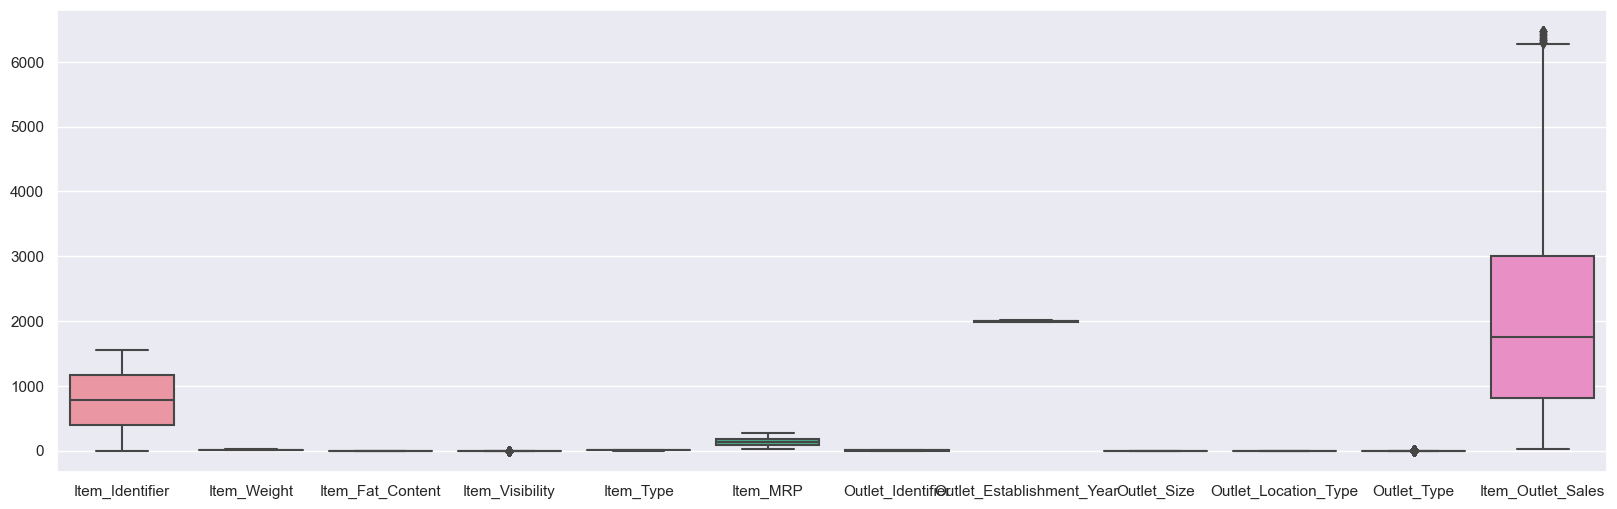

In [44]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=filtered_big_mart_data_train, ax = ax)

**Splitting Feature and Target**

In [96]:
X = filtered_big_mart_data_train.drop(columns = 'Item_Outlet_Sales', axis = 1)
Y = filtered_big_mart_data_train['Item_Outlet_Sales']

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [48]:
# Data Scaling or Normalization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)
x_test2 = sc.transform(big_mart_data_test)

In [49]:
print(X.shape, x_train.shape, x_test.shape)

(8337, 11) (6669, 11) (1668, 11)


# Machine Learning Model Training

**XGBoost Regressor**

In [50]:
regressor = XGBRegressor()

In [51]:
regressor.fit(x_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evalution

In [105]:
# prediction on training data
training_data_prediction = regressor.predict(x_train)

In [106]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [107]:
print('R squared value', r2_train )

R squared value 0.8480750600941432


In [108]:
# prediction on test data
test_data_prediction = regressor.predict(x_test)

In [111]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [112]:
print('R squared value', r2_test )

R squared value 0.4782828241270818


In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Define a grid of hyperparameters to search through
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Perform the grid search
grid_search.fit(x_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}


NameError: name 'XGBClassifier' is not defined

In [143]:
# Train the XGBoost model with the best hyperparameters
best_xgb_model = XGBRegressor(**best_params)
best_xgb_model.fit(x_train, Y_train)

# Train data
y_pred_train = y_pred = best_xgb_model.predict(x_train)
accuracy = metrics.r2_score(Y_train, y_pred_train)
print("Test Accuracy:", accuracy)

[22:20:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

Test Accuracy: 0.6273040594008343


In [142]:
# Make predictions on the test set
y_pred = best_xgb_model.predict(x_test)

# Evaluate the model's performance
accuracy = metrics.r2_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5701161054191448


**LinearRegression**

In [115]:
lr = LinearRegression()

In [116]:
lr.fit(x_train, Y_train)

LinearRegression()

In [117]:
# prediction on test data
test_data_prediction_linear = lr.predict(x_test)

In [118]:
# R squared Value
r2_testL = metrics.r2_score(Y_test, test_data_prediction_linear)

In [119]:
print('R squared value', r2_test )

R squared value 0.4782828241270818


In [120]:
# prediction on training data

training_data_prediction_linear = regressor.predict(x_train)

In [121]:
# R squared Value

r2_train_linear = metrics.r2_score(Y_train, training_data_prediction_linear)

In [122]:
print('R squared value', r2_train_linear )

R squared value 0.8480750600941432


**GradientBoostingRegressor**

In [123]:
GBR_model=GradientBoostingRegressor()

In [124]:
GBR_model.fit(X_train,Y_train)
y_predict_test_Gradient = model.predict(X_test)

In [126]:
# Train Score
y_predict_train_Gradient = model.predict(X_train)
r2_trainingG = metrics.r2_score(Y_train, y_predict_train_Gradient)
r2_trainingG

0.6263374016465637

In [133]:
# Test Score
r2_test_Gradient = metrics.r2_score(Y_test, y_predict_test_Gradient)
r2_test_Gradient

0.5696586830763861

In [90]:

# Define a grid of hyperparameters to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'alpha': [0.9, 0.95, 0.99]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=GBR_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Perform the grid search
grid_search.fit(x_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)




Best Hyperparameters: {'alpha': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.9}


NameError: name 'y_train' is not defined

In [139]:
# Train the GradientBoostingRegressor with the best hyperparameters
best_gb_model = GradientBoostingRegressor(**best_params)
best_gb_model.fit(x_train, Y_train)

# Prediction on train data
y_pred_train = y_pred = best_gb_model.predict(x_train)
metrics.r2_score(Y_train, y_pred_train)

0.6287469772445653

In [141]:
# Make predictions on the test set
y_pred = best_gb_model.predict(x_test)

# Evaluate the model's performance using mean squared error
metrics.r2_score(Y_test, y_pred)

0.5712913490694422

**Random Forest**

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
rf = RandomForestRegressor()

In [130]:
model.fit(X_train, Y_train)
y_predict_test_rf = model.predict(X_test)
y_predict_train_rf = model.predict(X_train)

In [131]:
# Train Score
r2_train_rf = metrics.r2_score(Y_train, y_predict_train_rf)
r2_train_rf

0.6263374016465637

In [132]:
# Test Score
r2_test_rf = metrics.r2_score(Y_test, y_predict_test_rf)
r2_test_rf

0.5688286078427967